# Lets Grow More

<b>Data Science and Analytics Intern

<b>Author: pruthviraj Yamgar

<b>Task 2: Stock Price Prediction and Forecasting using Stacked LSTM

<b>In this task, we will predict the stock price usnig Stacked LSTM.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Stock_Price.txt')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.shape

(2035, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.isnull().values.any()

False

In [7]:
df.duplicated().values.any()

False

In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
df_close = df.reset_index()['Close']
df_close.shape

(2035,)

In [11]:
df_close.tail()

2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, dtype: float64

Text(0.5, 1.0, 'Date wise Closing Price')

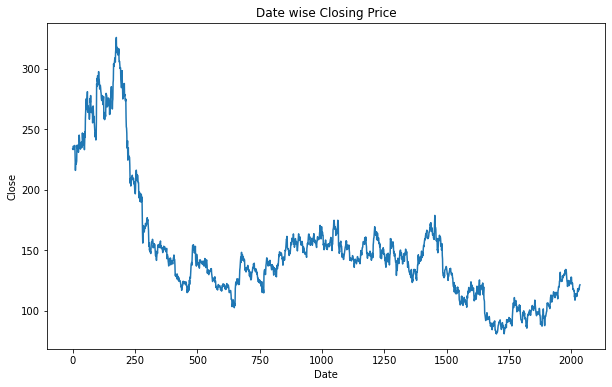

In [12]:
plt.rcParams['figure.figsize']=(10,6)
plt.plot(df_close)
plt.xlabel('Date',size=10)
plt.ylabel('Close',size=10)
plt.title('Date wise Closing Price')

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range = (0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [14]:
df_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [15]:
train_size = int(len(df_close)*0.7)
test_size = len(df_close)-train_size
train_data, test_data =df_close[0:train_size,:],df_close[train_size:len(df_close),:1]

In [16]:
train_size,test_size

(1424, 611)

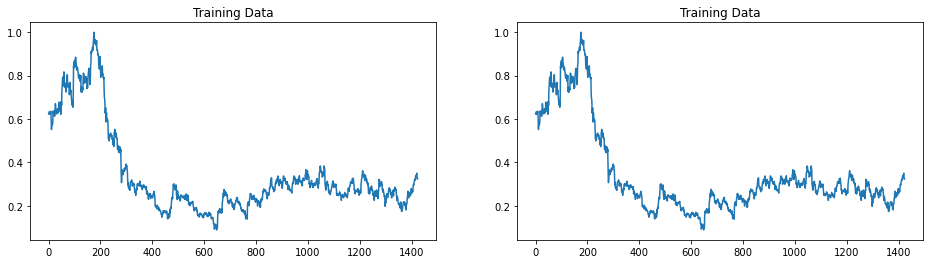

In [17]:
plt.rcParams['figure.figsize']=(16,4)

plt.subplot(121)
plt.plot(train_data)
plt.title('Training Data')

plt.subplot(122)
plt.plot(train_data)
plt.title('Training Data')

plt.show()

In [18]:
def create_dataset(data, steps=1):
    dataX, dataY= [], []
    for i in range(len(data)-steps-1):
        z = data[i:(i+steps),0]
        dataX.append(z)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)      

In [19]:
steps = 100
x_train, y_train = create_dataset(train_data, steps)
x_test, y_test = create_dataset(test_data, steps)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((1323, 100), (1323,), (510, 100), (510,))

In [21]:
x_train, y_train

(array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
         0.85273693],
        [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
         0.87111928],
        [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
         0.84497549],
        ...,
        [0.26041667, 0.2563317 , 0.24652778, ..., 0.33415033, 0.33986928,
         0.34681373],
        [0.2563317 , 0.24652778, 0.23611111, ..., 0.33986928, 0.34681373,
         0.3500817 ],
        [0.24652778, 0.23611111, 0.25204248, ..., 0.34681373, 0.3500817 ,
         0.32618464]]),
 array([0.87111928, 0.84497549, 0.84027778, ..., 0.3500817 , 0.32618464,
        0.32271242]))

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [23]:
x_train

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.83455882],
        [0.86213235],
        [0.85273693]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.86213235],
        [0.85273693],
        [0.87111928]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.85273693],
        [0.87111928],
        [0.84497549]],

       ...,

       [[0.26041667],
        [0.2563317 ],
        [0.24652778],
        ...,
        [0.33415033],
        [0.33986928],
        [0.34681373]],

       [[0.2563317 ],
        [0.24652778],
        [0.23611111],
        ...,
        [0.33986928],
        [0.34681373],
        [0.3500817 ]],

       [[0.24652778],
        [0.23611111],
        [0.25204248],
        ...,
        [0.34681373],
        [0.3500817 ],
        [0.32618464]]])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer = 'adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 100, batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 7s 172ms/step - loss: 0.0199 - val_loss: 0.0077
Epoch 2/100
21/21 [==============================] - 2s 105ms/step - loss: 0.0027 - val_loss: 7.1475e-04
Epoch 3/100
21/21 [==============================] - 2s 100ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/100
21/21 [==============================] - 2s 99ms/step - loss: 0.0016 - val_loss: 8.9052e-04
Epoch 5/100
21/21 [==============================] - 2s 101ms/step - loss: 0.0015 - val_loss: 9.6149e-04
Epoch 6/100
21/21 [==============================] - 2s 101ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 7/100
21/21 [==============================] - 2s 100ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/100
21/21 [==============================] - 2s 100ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
21/21 [==============================] - 2s 100ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
21/21 [==============================] - 2s 100ms/step - loss: 0.00

In [28]:
import tensorflow as tf

In [29]:
train_pred= model.predict(x_train)
test_pred= model.predict(x_test)

In [30]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [31]:
train_pred, test_pred

(array([[291.31064],
        [294.2367 ],
        [290.49713],
        ...,
        [165.21439],
        [166.40923],
        [164.38484]], dtype=float32),
 array([[130.41249 ],
        [129.31049 ],
        [127.16974 ],
        [124.67337 ],
        [122.701515],
        [121.843765],
        [122.53341 ],
        [121.41518 ],
        [120.6046  ],
        [121.05016 ],
        [121.29419 ],
        [120.50259 ],
        [118.9145  ],
        [117.40434 ],
        [116.752045],
        [117.00026 ],
        [117.37032 ],
        [117.20807 ],
        [117.81894 ],
        [119.14703 ],
        [120.21345 ],
        [120.97915 ],
        [120.90808 ],
        [119.87648 ],
        [118.663994],
        [118.16516 ],
        [117.62231 ],
        [115.61529 ],
        [113.1569  ],
        [111.153   ],
        [109.6116  ],
        [108.37423 ],
        [107.7925  ],
        [108.19595 ],
        [108.54363 ],
        [109.34649 ],
        [111.082756],
        [112.52486 ],
        

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

166.0858460591878

In [33]:
math.sqrt(mean_squared_error(y_test, test_pred))

108.58231747695027

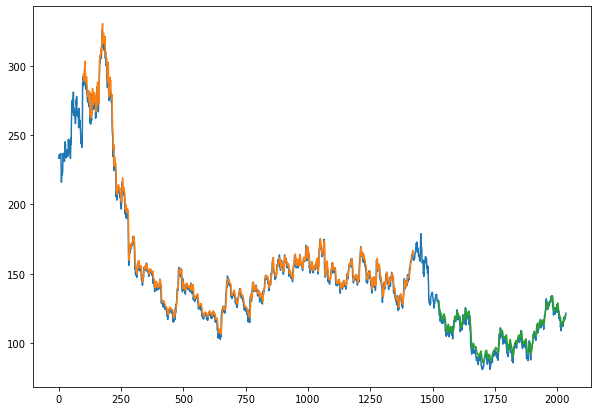

In [34]:
look_back = 100
trainPredPlot = np.empty_like(df_close)
trainPredPlot[:, :] = np.nan
trainPredPlot[look_back:len(train_pred)+look_back, :] = train_pred

testPredPlot = np.empty_like(df_close)
testPredPlot[:, :] = np.nan
testPredPlot[len(train_pred)+ (look_back*2)+1:len(df_close)-1, :] = test_pred

plt.rcParams['figure.figsize']=(10,7)

plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.show()

In [35]:
x_input = test_data[0:100].reshape(1,-1)

In [36]:
x_input.shape

(1, 100)

In [37]:
list_input = list(x_input)
list_input = list_input[0].tolist()

In [38]:
list_input

[0.32148692810457513,
 0.32352941176470584,
 0.32557189542483667,
 0.32638888888888884,
 0.33496732026143783,
 0.34395424836601307,
 0.34415849673202614,
 0.3459967320261438,
 0.3586601307189542,
 0.3558006535947713,
 0.372140522875817,
 0.3629493464052288,
 0.37540849673202614,
 0.36315359477124176,
 0.3464052287581699,
 0.3457924836601307,
 0.34844771241830064,
 0.357843137254902,
 0.3472222222222222,
 0.33353758169934633,
 0.3353758169934641,
 0.3368055555555556,
 0.3368055555555556,
 0.32271241830065356,
 0.32638888888888884,
 0.3188316993464052,
 0.33986928104575165,
 0.3776552287581699,
 0.3999183006535948,
 0.36968954248366004,
 0.3588643790849674,
 0.3592728758169935,
 0.3529411764705882,
 0.3210784313725491,
 0.31413398692810457,
 0.3174019607843137,
 0.3159722222222222,
 0.32209967320261446,
 0.2826797385620915,
 0.2849264705882353,
 0.27389705882352944,
 0.2877859477124183,
 0.3018790849673202,
 0.3104575163398692,
 0.32128267973856206,
 0.3145424836601307,
 0.33129084967320